In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
mnist=keras.datasets.mnist

In [2]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [5]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

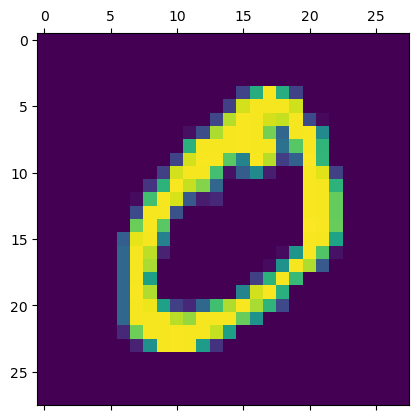

In [50]:
plt.matshow(X_train[1])

In [52]:
y_train[1]

0

In [19]:
y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train.shape

(60000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

In [29]:
X_train=X_train/255
X_test=X_test/255

In [178]:
X_train.shape

(60000, 28, 28)

In [180]:
X_test.shape

(10000, 28, 28)

In [194]:
#creating the NEURAL NETWORK
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')])

C:\Users\Taimur\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [196]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8427 - loss: 0.6056
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9425 - loss: 0.1957
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9629 - loss: 0.1312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9703 - loss: 0.1014
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9782 - loss: 0.0745


In [200]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9682 - loss: 0.1021


[0.09023181349039078, 0.9725000262260437]

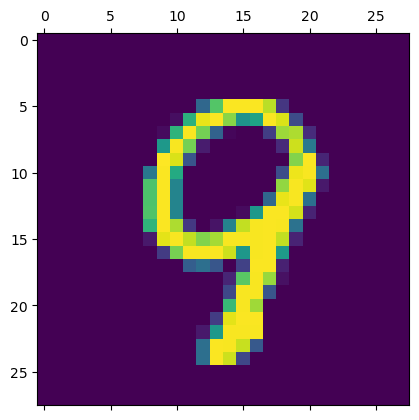

In [202]:
plt.matshow(X_test[5001])

In [204]:
y_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [206]:
y_predict[5001]


array([1.73766864e-03, 4.64398967e-04, 4.66097035e-02, 2.41245165e-01,
       8.08110714e-01, 1.37797315e-02, 8.57906695e-03, 5.62365130e-02,
       9.16233659e-01, 9.86067653e-01], dtype=float32)

In [208]:
np.argmax(y_predict[5001])

9

In [102]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

In [112]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [118]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [120]:
#HeatMap For Confusion Matrix
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    0,    2,    2,    2,    1,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   5,    0, 1006,    1,    4,    0,    2,    8,    6,    0],
       [   0,    0,   11,  967,    0,   10,    0,   10,    8,    4],
       [   1,    0,    3,    1,  951,    0,    4,    4,    2,   16],
       [   2,    1,    1,    5,    1,  871,    5,    1,    4,    1],
       [   7,    3,    3,    0,    4,    9,  928,    1,    3,    0],
       [   1,    2,   12,    0,    0,    0,    0, 1004,    0,    9],
       [   4,    1,    5,    5,    4,    5,    1,    6,  940,    3],
       [   5,    4,    0,    6,    7,    2,    0,    7,    1,  977]])>